In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from tensorflow.keras.datasets import mnist
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
import random

In [2]:
%%time
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

11501568/11490434 [==============================] - 0s 0us/step
CPU times: user 335 ms, sys: 73.8 ms, total: 409 ms
Wall time: 484 ms


In [3]:
%%time
k_values = [1, 3, 5, 7, 9]
accuracies = []
for k in k_values:
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(x_train, y_train)
  test_predicted_labels = model.predict(x_test)
  accuracies.append(accuracy_score(y_test, test_predicted_labels))
  print("K = ", k, "Accuracy score:", accuracies[-1])

K =  1 Accuracy score: 0.9691
K =  3 Accuracy score: 0.9705
K =  5 Accuracy score: 0.9688
K =  7 Accuracy score: 0.9694
K =  9 Accuracy score: 0.9659
CPU times: user 5min 14s, sys: 6.27 s, total: 5min 20s
Wall time: 3min 5s


In [4]:
indexOf = accuracies.index(max(accuracies))
indexOf

1

In [5]:
%%time
knn = KNeighborsClassifier(n_neighbors=k_values[indexOf])


CPU times: user 26 µs, sys: 0 ns, total: 26 µs
Wall time: 32.9 µs


In [6]:
%%time
#Train on the mini train set.

knn.fit(x_train, y_train)

CPU times: user 7.15 ms, sys: 1.98 ms, total: 9.13 ms
Wall time: 8.56 ms


KNeighborsClassifier(n_neighbors=3)

In [7]:
%%time
#Evaluate performance on the dev set.

knn_predictions = knn.predict(x_test)

CPU times: user 1min, sys: 1 s, total: 1min 1s
Wall time: 34.9 s


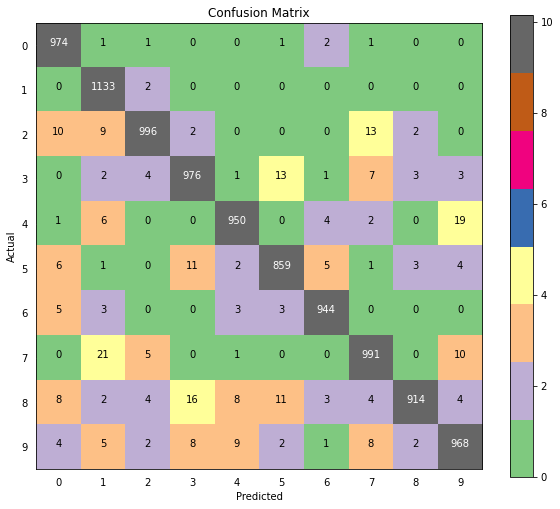

CPU times: user 886 ms, sys: 36 ms, total: 922 ms
Wall time: 927 ms


In [11]:
%%time
con_matrix = confusion_matrix(y_test,knn_predictions)

f = plt.figure(figsize=(10,8.5))
f.add_subplot(111)

plt.imshow(np.log2(con_matrix+1),cmap="Accent")
plt.colorbar()
plt.tick_params(size=5,color="white")
plt.xticks(np.arange(0,10),np.arange(0,10))
plt.yticks(np.arange(0,10),np.arange(0,10))

threshold = con_matrix.max()/2 

for i in range(10):
    for j in range(10):
        plt.text(j,i,int(con_matrix[i,j]),horizontalalignment="center",color="white" if con_matrix[i, j] > threshold else "black")
        
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig("Confusion_matrix2.png")
plt.show()

In [12]:
%%time
score=accuracy_score(y_test,knn_predictions)
print(score)

0.9705
CPU times: user 2.13 ms, sys: 958 µs, total: 3.09 ms
Wall time: 3.09 ms


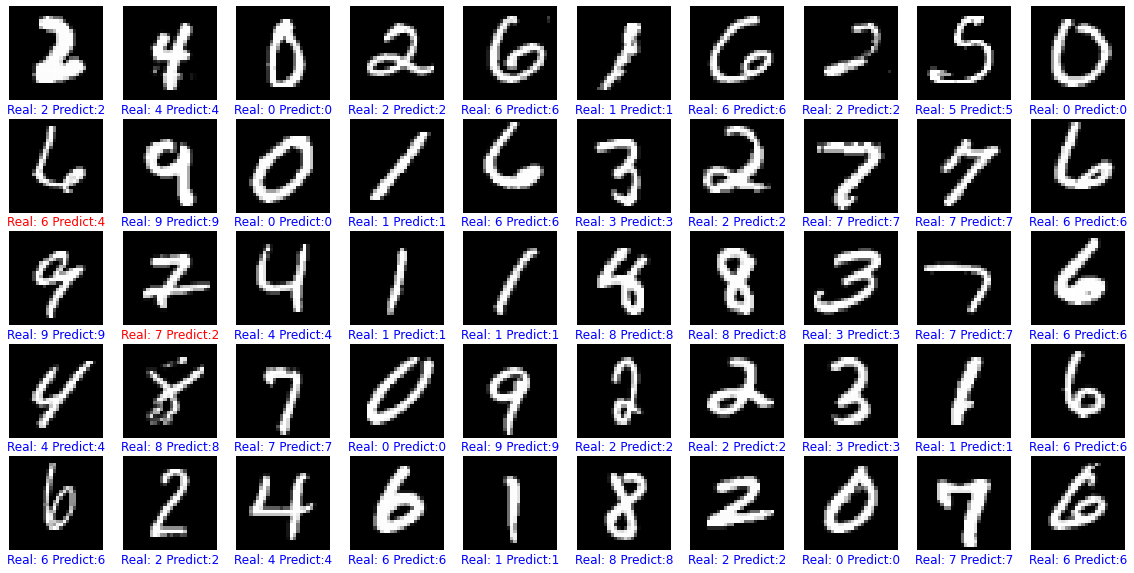

CPU times: user 2.38 s, sys: 52.1 ms, total: 2.43 s
Wall time: 2.42 s


In [14]:
%%time
rows = 5
cols = 10
sub_plot = 1
f = plt.figure(figsize=(2*cols,2*rows))
for i in range(50):
      index = random.randint(0,10000)
      f.add_subplot(rows,cols,sub_plot) 
      sub_plot+=1
      plt.imshow(x_test[index].reshape((28,28)),cmap='gray')
      plt.axis("off")
      if knn_predictions[index] == y_test[index]:
        plt.title("Real: "+str(y_test[index])+" Predict:"+str(int(knn_predictions[index])), y=-0.20,color="Blue")
      else: 
        plt.title("Real: "+str(y_test[index])+" Predict:"+str(int(knn_predictions[index])), y=-0.20,color="Red")
plt.savefig("predictions.png")
plt.show()